In [4]:
import pandas as pd
from sodapy import Socrata
#Import dependancy 
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress


# La_crime_path='Arrest_Data_from_2010_to_2019.csv'
# La_crime=pd.read_csv(La_crime_path)


La_crime_df=pd.read_csv("../output/Arrest_Data_from_2010_to_2019.csv")
La_crime_df

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,140204136,RFC,01/01/2014,1930.0,2,Rampart,246,36,M,B,...,MISDEMEANOR COMPLAINT FILED,600 S ALVARADO ST,NaN,34.0596,-118.2749,POINT (-118.2749 34.0596),NaN,NaN,NaN,NaN
1,141404255,RFC,01/01/2014,1725.0,14,Pacific,1412,36,M,W,...,MISDEMEANOR COMPLAINT FILED,OCEAN FRONT,ROSE,33.9947,-118.4805,POINT (-118.4805 33.9947),NaN,NaN,NaN,NaN
2,140904046,RFC,01/01/2014,130.0,9,Van Nuys,989,26,M,W,...,MISDEMEANOR COMPLAINT FILED,13600 MOORPARK ST,NaN,34.1504,-118.4296,POINT (-118.4296 34.1504),NaN,NaN,NaN,NaN
3,141404247,RFC,01/01/2014,1740.0,14,Pacific,1412,21,M,W,...,MISDEMEANOR COMPLAINT FILED,PARK,OCEAN FRONT,33.9913,-118.4775,POINT (-118.4775 33.9913),NaN,NaN,NaN,NaN
4,141404252,RFC,01/01/2014,1650.0,14,Pacific,1431,20,M,W,...,MISDEMEANOR COMPLAINT FILED,MARKET,OCEAN FRONT,33.9875,-118.4741,POINT (-118.4741 33.9875),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680958,5835175,BOOKING,12/31/2019,300.0,19,Mission,1911,26,M,H,...,FELONY COMPLAINT FILED,ROXFORD,ENCINITAS,34.3039,-118.4789,POINT (-118.4789 34.3039),12/31/2019 12:00:00 AM,605.0,VALLEY - JAIL DIV,4279.0
680959,5835176,BOOKING,12/31/2019,359.0,11,Northeast,1159,44,M,H,...,NaN,AVENUE 43,HOMER ST,34.0994,-118.2035,POINT (-118.2035 34.0994),12/31/2019 12:00:00 AM,606.0,77TH ST,4212.0
680960,5835272,BOOKING,12/31/2019,910.0,21,Topanga,2144,22,M,W,...,NaN,FALLBROOK,OXNARD,34.1792,-118.6233,POINT (-118.6233 34.1792),12/31/2019 12:00:00 AM,1040.0,VALLEY - JAIL DIV,4279.0
680961,5835308,BOOKING,12/31/2019,1010.0,9,Van Nuys,969,26,M,H,...,FELONY COMPLAINT FILED,12500 RIVERSIDE DR,NaN,34.1576,-118.4052,POINT (-118.4052 34.1576),12/31/2019 12:00:00 AM,1201.0,VALLEY - JAIL DIV,4279.0


In [7]:
new_crime_df=La_crime_df.drop(columns=['Report ID','Report Type','Time','Area ID','Area Name','Reporting District','Descent Code','Charge Group Code','Charge Group Description','Arrest Type Code','Charge','Address','Cross Street','Location','Booking Date','Booking Time','Booking Location','Booking Location Code','Disposition Description'])
new_crime_df

,Arrest Date,Age,Sex Code,Charge Description,LAT,LON
0,01/01/2014,36,M,NaN,34.0596,-118.2749
1,01/01/2014,36,M,NaN,33.9947,-118.4805
2,01/01/2014,26,M,NaN,34.1504,-118.4296
3,01/01/2014,21,M,NaN,33.9913,-118.4775
4,01/01/2014,20,M,NaN,33.9875,-118.4741
...,...,...,...,...,...,...
680958,12/31/2019,26,M,TRANSPORT/SELL/ETC CONTROLLED SUBSTANCE,34.3039,-118.4789
680959,12/31/2019,44,M,DRUNK DRIVING ALCOHOL/DRUGS,34.0994,-118.2035
680960,12/31/2019,22,M,OBSTRUCT/RESIST EXECUTIVE OFFICER,34.1792,-118.6233
680961,12/31/2019,26,M,WARRANT-PETITION TO REVOKE COMMUNITY SUPVN,34.1576,-118.4052


In [8]:
crime_s = La_crime_df["Charge Description"].value_counts()
crime_s


DRUNK DRIVING ALCOHOL/DRUGS                  47684
CORPORAL INJURY ON SPOUSE/COHABITANT/ETC     28319
POSSESSION CONTROLLED SUBSTANCE              24776
DRINKING IN PUBLIC                           23006
SIT/LIE/SLEEP SIDEWALK OR STREET             15845
                                             ...  
UNLAWFULLY DISTURB FUNERAL SERVICE               1
IDENTITY THEFT                                   1
DRIVING W/DEFECTIV WINDSHIELD/REAR WINDOW        1
DUMP ROCKS/DIRT                                  1
TMPROPER VEHICLE REMOVAL                         1
Name: Charge Description, Length: 1920, dtype: int64

In [4]:
crime_s.to_csv('Crime_list.csv')

In [9]:
new_crime_df.index=pd.to_datetime(new_crime_df.index)
new_crime_df['Arrest Date'] = pd.to_datetime(new_crime_df['Arrest Date'], errors='coerce')

In [74]:
new_crime_df['day'] = new_crime_df['Arrest Date'].dt.day
new_crime_df['month'] = new_crime_df['Arrest Date'].dt.month
new_crime_df['year'] = new_crime_df['Arrest Date'].dt.year
new_crime_df

,Arrest Date,Age,Sex Code,Charge Description,LAT,LON,day,month,year
1970-01-01 00:00:00.000000000,2014-01-01,36,M,NaN,34.0596,-118.2749,1,1,2014
1970-01-01 00:00:00.000000001,2014-01-01,36,M,NaN,33.9947,-118.4805,1,1,2014
1970-01-01 00:00:00.000000002,2014-01-01,26,M,NaN,34.1504,-118.4296,1,1,2014
1970-01-01 00:00:00.000000003,2014-01-01,21,M,NaN,33.9913,-118.4775,1,1,2014
1970-01-01 00:00:00.000000004,2014-01-01,20,M,NaN,33.9875,-118.4741,1,1,2014
...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000680958,2019-12-31,26,M,TRANSPORT/SELL/ETC CONTROLLED SUBSTANCE,34.3039,-118.4789,31,12,2019
1970-01-01 00:00:00.000680959,2019-12-31,44,M,DRUNK DRIVING ALCOHOL/DRUGS,34.0994,-118.2035,31,12,2019
1970-01-01 00:00:00.000680960,2019-12-31,22,M,OBSTRUCT/RESIST EXECUTIVE OFFICER,34.1792,-118.6233,31,12,2019
1970-01-01 00:00:00.000680961,2019-12-31,26,M,WARRANT-PETITION TO REVOKE COMMUNITY SUPVN,34.1576,-118.4052,31,12,2019


In [12]:
drop_new=new_crime_df.drop(columns=['Arrest Date','day','month','LAT','LON'])
drop_new

,Age,Sex Code,Charge Description,year
1970-01-01 00:00:00.000000000,36,M,NaN,2014
1970-01-01 00:00:00.000000001,36,M,NaN,2014
1970-01-01 00:00:00.000000002,26,M,NaN,2014
1970-01-01 00:00:00.000000003,21,M,NaN,2014
1970-01-01 00:00:00.000000004,20,M,NaN,2014
...,...,...,...,...
1970-01-01 00:00:00.000680958,26,M,TRANSPORT/SELL/ETC CONTROLLED SUBSTANCE,2019
1970-01-01 00:00:00.000680959,44,M,DRUNK DRIVING ALCOHOL/DRUGS,2019
1970-01-01 00:00:00.000680960,22,M,OBSTRUCT/RESIST EXECUTIVE OFFICER,2019
1970-01-01 00:00:00.000680961,26,M,WARRANT-PETITION TO REVOKE COMMUNITY SUPVN,2019


In [16]:
drop2=drop_new.dropna()
drop2

,Age,Sex Code,Charge Description,year
1970-01-01 00:00:00.000000017,20,F,BATTERY ON PERSON,2014
1970-01-01 00:00:00.000000018,59,M,DRINKING IN PUBLIC,2014
1970-01-01 00:00:00.000000019,41,M,DRINKING IN PUBLIC,2014
1970-01-01 00:00:00.000000020,44,M,DRINKING IN PUBLIC,2014
1970-01-01 00:00:00.000000021,35,M,SELL LIQUOR W/O LICENSE,2014
...,...,...,...,...
1970-01-01 00:00:00.000680958,26,M,TRANSPORT/SELL/ETC CONTROLLED SUBSTANCE,2019
1970-01-01 00:00:00.000680959,44,M,DRUNK DRIVING ALCOHOL/DRUGS,2019
1970-01-01 00:00:00.000680960,22,M,OBSTRUCT/RESIST EXECUTIVE OFFICER,2019
1970-01-01 00:00:00.000680961,26,M,WARRANT-PETITION TO REVOKE COMMUNITY SUPVN,2019


In [100]:
drop2.to_csv('Crime_sort_by_year.csv')

In [59]:
crimes_year_df = drop2.groupby("year").count()
crimes_year_df.reset_index(inplace=True)
crimes_year_df = crimes_year_df.drop(columns=["Age", "Sex Code"])
crimes_year_df = crimes_year_df.rename(columns={"Charge Description": "Charge count per year"})
crimes_year_df.head()

,year,Charge count per year
0,2014,128734
1,2015,115503
2,2016,108588
3,2017,99624
4,2018,93585


In [70]:
# Study data files
airport_weather_df = pd.read_csv("../output/Cleansed Airport Weather Data LAX.csv")
airport_weather_df.head()
# airport_weather_mean = airport_weather_df.groupby("DATE").mean()["Maximum Temperature"]
# airport_weather_mean.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Peak Gust Time,Preciption,Snowfall,...,Maximum Temperature,Minimum Temperature,Direction of fastest 2-minute wind,Direction of fastest 5-minute wind,Fastest 2-minute wind,Fastest 5-minute wind,"Fog, ice fog, or freezing fog",Heavy fog or heaving freezing fog,Thunder,Smoke or haze
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/1/2014,3.58,0.0,0.0,0.0,...,64,46,260,220.0,10.1,16.1,0.0,0.0,0.0,0.0
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/2/2014,4.92,0.0,0.0,0.0,...,78,50,270,270.0,12.1,14.1,1.0,0.0,0.0,0.0
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/3/2014,3.80,0.0,0.0,0.0,...,64,47,250,270.0,13.0,17.0,0.0,0.0,0.0,0.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/4/2014,4.03,0.0,0.0,0.0,...,65,50,260,280.0,10.1,14.1,0.0,0.0,0.0,0.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,1/5/2014,4.03,0.0,0.0,0.0,...,76,47,270,290.0,14.1,16.1,0.0,0.0,0.0,0.0


In [65]:
crimes_year_df.to_csv("../output/crimes_per_year.csv")


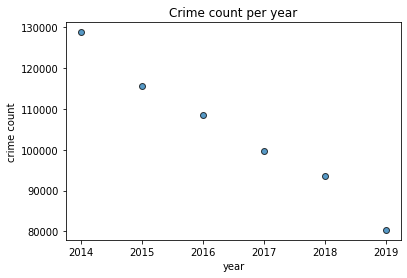

In [127]:
x_value = crimes_year_df["year"]
y_value = crimes_year_df["Charge count per year"]

plt.scatter(x_value, y_value, edgecolors="black", alpha=0.75)

plt.xlabel("year")
plt.ylabel("crime count")
plt.title("Crime count per year")
plt.show()


In [132]:
weather_year_df = pd.read_csv("../output/Cleansed Annual Weather Data LAX.csv")
weather_year_df.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Cooling Degree Days (season-to-date),Cooling Degree Days,Number of Days with >=0.01 inch,...,Heating Degree Days,Preciption,Snowfall,Average Temperature,Maximum Temperature,Minimum Temperature,Direction of fastest 2-minute wind,Direction of fastest 5-minute wind,Fastest 2-minute wind,Fastest 5-minute wind
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,0.0,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,0.0,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,0.0,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,0.0,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,0.0,65.2,72.2,58.3,260,270,36.9,44.1


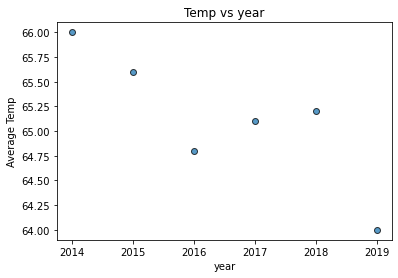

In [134]:
x_value = weather_year_df["DATE"]
y_value = weather_year_df["Average Temperature"]

plt.scatter(x_value, y_value, edgecolors="black", alpha=0.75)

plt.xlabel("year")
plt.ylabel("Average Temp")
plt.title("Temp vs year")
plt.show()

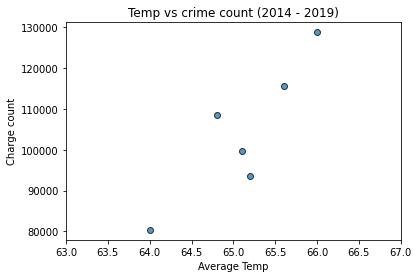

In [144]:
weather_year_df = weather_year_df.rename(columns={"DATE": 'year'})
weather_year_df
merge_weather_crime = pd.merge(crimes_year_df, weather_year_df)
merge_weather_crime

x_value = merge_weather_crime["Average Temperature"]
y_value = merge_weather_crime["Charge count per year"]

plt.scatter(x_value, y_value, edgecolors="black", alpha=0.75)

plt.xlim(63, 67)
plt.xlabel("Average Temp")
plt.ylabel("Charge count")
plt.title("Temp vs crime count (2014 - 2019)")
plt.show()

In [146]:
merge_weather_crime

,year,Charge count per year,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,Average wind speed,Cooling Degree Days (season-to-date),Cooling Degree Days,...,Heating Degree Days,Preciption,Snowfall,Average Temperature,Maximum Temperature,Minimum Temperature,Direction of fastest 2-minute wind,Direction of fastest 5-minute wind,Fastest 2-minute wind,Fastest 5-minute wind
0,2014,128734,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,6.9,1125,1125,...,809,8.30,0.0,66.0,72.9,59.1,270,270,36.9,44.1
1,2015,115503,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,6.9,1183,1183,...,872,5.96,0.0,65.6,72.7,58.4,270,270,36.9,40.9
2,2016,108588,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,7.4,901,901,...,1025,10.30,0.0,64.8,71.9,57.8,260,260,46.1,53.0
3,2017,99624,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,7.4,994,994,...,1079,12.28,0.0,65.1,72.4,57.8,270,110,36.0,45.0
4,2018,93585,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,7.4,1019,1019,...,843,7.80,0.0,65.2,72.2,58.3,260,270,36.9,44.1
5,2019,80377,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,7.6,841,841,...,1148,18.73,0.0,64.0,70.8,57.1,270,320,38.0,51.0


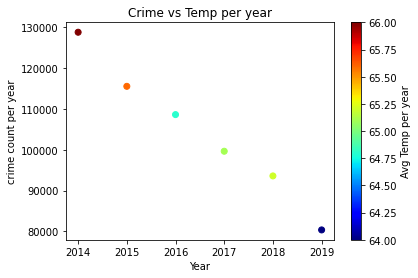

In [152]:
plt.scatter(merge_weather_crime['year'],merge_weather_crime['Charge count per year'],c=merge_weather_crime['Average Temperature'],
            cmap="jet")
clb = plt.colorbar()
plt.xlabel("Year")
plt.ylabel("crime count per year")
clb.set_label("Avg Temp per year")
plt.title("Crime vs Temp per year")
plt.show()

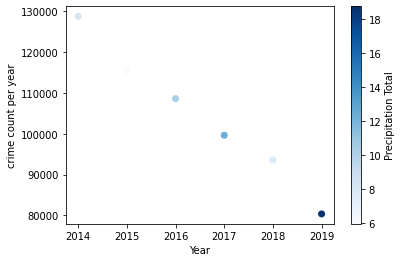

In [154]:
plt.scatter(merge_weather_crime['year'],merge_weather_crime['Charge count per year'],c=merge_weather_crime['Preciption'],
            cmap="Blues")
clb = plt.colorbar()
plt.xlabel("Year")
plt.ylabel("crime count per year")
clb.set_label("Precipitation Total")
#plt.title("Crime vs Precipitation per year")
plt.show()